In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from statsmodels.tools.eval_measures import mse, rmse
from wordcloud import WordCloud
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn import neighbors
from IPython.display import Image
from sklearn import metrics
from sklearn.metrics import pairwise_distances



import pydotplus
from sklearn import ensemble

import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore')
import time

In [2]:
boston_df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
df_boston = boston_df

In [4]:
#examine the data frame

print(
    df_boston.head(),
    df_boston.info(),
    df_boston.describe()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB
     10k                name  division    25k gender  age  official bib  \
0  17.37  Yamamoto, H

NTS: Drop 'state' and 'ctz' and 'name', probably ignore 'city', 'bib', 'genderdiv' and maybe 'division'; delete the one NaN entry from city. Convert all possible columns to numeric.

In [5]:
df_boston['5k']=pd.to_numeric(df_boston['5k'], errors='coerce')
df_boston['10k']=pd.to_numeric(df_boston['10k'], errors='coerce')
df_boston['20k']=pd.to_numeric(df_boston['20k'], errors='coerce')
df_boston['25k']=pd.to_numeric(df_boston['25k'], errors='coerce')
df_boston['30k']=pd.to_numeric(df_boston['30k'], errors='coerce')
df_boston['35k']=pd.to_numeric(df_boston['35k'], errors='coerce')
df_boston['40k']=pd.to_numeric(df_boston['40k'], errors='coerce')
df_boston['half']=pd.to_numeric(df_boston['half'], errors='coerce')

In [6]:
missing_values_ratios = (df_boston.isnull().sum()/df_boston.isnull().count())
missing_values_ratios.sort_values(ascending=False).head()

ctz      0.961106
state    0.080540
25k      0.006753
half     0.002251
5k       0.001626
dtype: float64

In [7]:
df_boston=df_boston.drop(['ctz', 'state'], axis=1)

In [8]:
missing_values_ratios = (df_boston.isnull().sum()/df_boston.isnull().count())
missing_values_ratios.sort_values(ascending=False).head()

25k     0.006753
half    0.002251
5k      0.001626
20k     0.001595
10k     0.001563
dtype: float64

In [9]:
df_boston=df_boston.dropna()

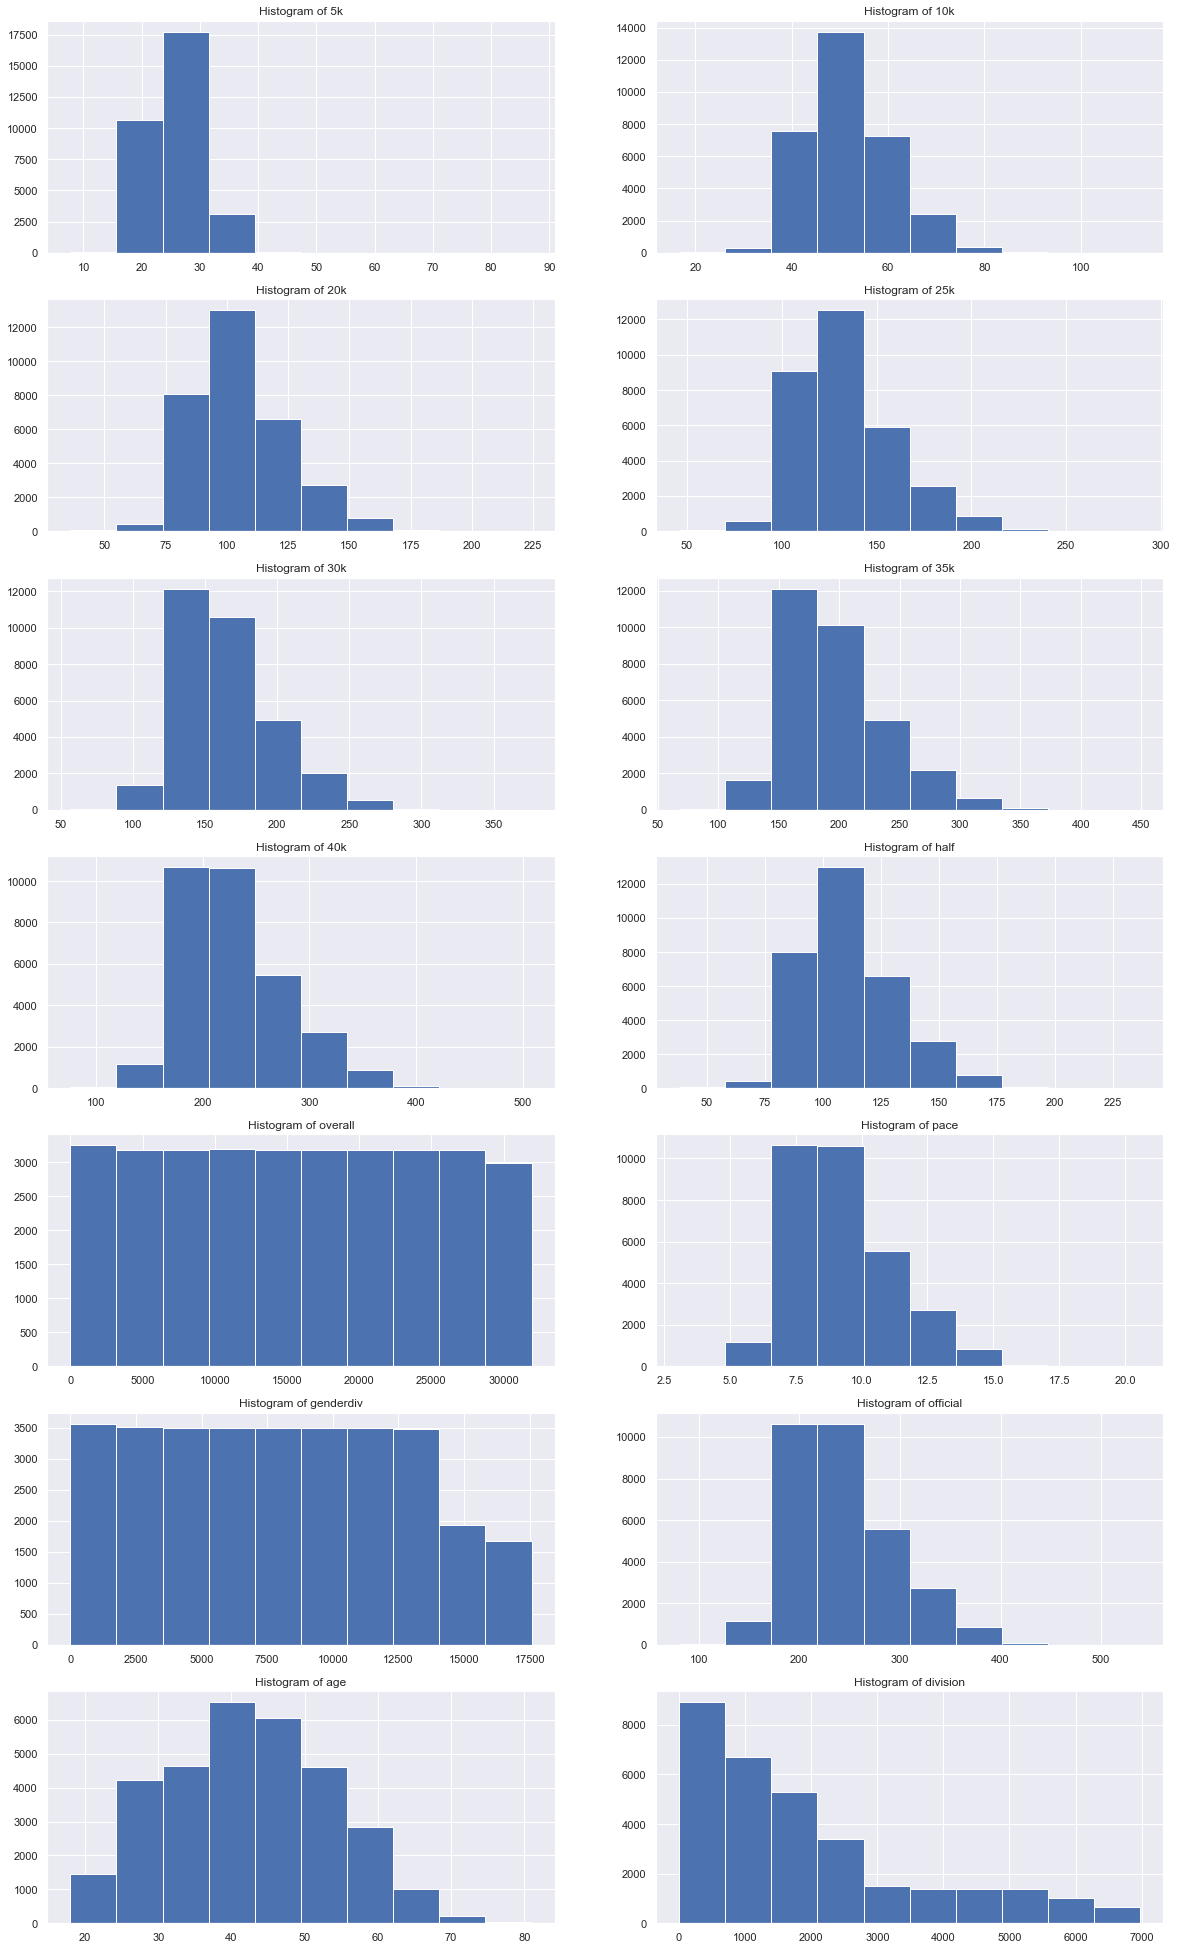

In [11]:
plt.figure(figsize=(20,35))
           
plt.subplot(7,2,1)
plt.hist(df_boston['5k'])
plt.title("Histogram of {}".format("5k"))

plt.subplot(7,2,2)
plt.hist(df_boston['10k'])
plt.title("Histogram of {}".format("10k"))

plt.subplot(7,2,3)
plt.hist(df_boston['20k'])
plt.title("Histogram of {}".format("20k"))

plt.subplot(7,2,4)
plt.hist(df_boston['25k'])
plt.title("Histogram of {}".format("25k"))

plt.subplot(7,2,5)
plt.hist(df_boston['30k'])
plt.title("Histogram of {}".format("30k"))

plt.subplot(7,2,6)
plt.hist(df_boston['35k'])
plt.title("Histogram of {}".format("35k"))

plt.subplot(7,2,7)
plt.hist(df_boston['40k'])
plt.title("Histogram of {}".format("40k"))

plt.subplot(7,2,8)
plt.hist(df_boston['half'])
plt.title("Histogram of {}".format("half"))

plt.subplot(7,2,9)
plt.hist(df_boston['overall'])
plt.title("Histogram of {}".format("overall"))

plt.subplot(7,2,10)
plt.hist(df_boston['pace'])
plt.title("Histogram of {}".format("pace"))

plt.subplot(7,2,11)
plt.hist(df_boston['genderdiv'])
plt.title("Histogram of {}".format("genderdiv"))

plt.subplot(7,2,12)
plt.hist(df_boston['official'])
plt.title("Histogram of {}".format("official"))

plt.subplot(7,2,13)
plt.hist(df_boston['age'])
plt.title("Histogram of {}".format("age"))

plt.subplot(7,2,14)
plt.hist(df_boston['division'])
plt.title("Histogram of {}".format("division"))
plt.show()


In [12]:
df_boston['gender'].value_counts()

M    17484
F    14164
Name: gender, dtype: int64

In [13]:
gender_bool = []

for idx, val in enumerate(df_boston['gender']):
    if val == 'F':
        gender_bool.append(1)
    else:
        gender_bool.append(0)
        
df_boston['gender_bool'] = gender_bool

In [14]:
df_boston['gender_bool'].value_counts()

0    17484
1    14164
Name: gender_bool, dtype: int64

In [120]:
age_category = []

for idx, val in enumerate(df_boston['age']):
    if val <= 25:
        age_category.append(0)
    elif val <= 40: 
        age_category.append(1)
    else:
        age_category.append(2)
        
df_boston['age_category'] = age_category

In [121]:
X = df_boston[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 
              'half', 'pace', 'official', 'age', 'division'
             ]]
y1 = df_boston['gender_bool']
y2 = df_boston['age_category']

In [61]:
X_norm = normalize(X)

In [62]:
n_comps = np.arange(0, 13)
param_grid_pca = [{'pca__n_components':n_comps}]
pipe_tree_pca = make_pipeline(PCA())

In [63]:
gs_pca = GridSearchCV(pipe_tree_pca, param_grid=param_grid_pca, cv=10)

In [123]:
gs_pca.fit(X_norm,y1)
print(gs_pca.best_params_)

{'pca__n_components': 12}


In [65]:
#using the results of GridSearchCV to perform PCA

sklearn_pca = PCA(n_components=12)  
X_pca = sklearn_pca.fit_transform(X_norm)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA:\n',
    sklearn_pca.explained_variance_ratio_
)

#X_pca is now our PCA engineered feature set.

The percentage of total variance in the dataset explained by each component from Sklearn PCA:
 [9.61348991e-01 3.74067044e-02 6.07719138e-04 5.66313399e-04
 4.75550857e-05 1.07083614e-05 5.32058209e-06 3.78946954e-06
 2.14071799e-06 5.97007347e-07 1.60383108e-07 3.67118754e-10]


In [66]:


# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)



In [122]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X_pca,
    y1,
    y2,
    test_size=0.1,
    random_state=42)

In [117]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=6, random_state=42).fit(sample)
    labels_test = model.labels_
    print(metrics.silhouette_score(sample, labels_test, metric='euclidean'))

0.6001023243365842
0.6028136386274416
0.6042301324319199
0.603873022091284


In [124]:
y1_pred = KMeans(n_clusters=6).fit(X_train)
labels = y1_pred.labels_

In [125]:

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y1_train, labels))

Comparing k-means clusters against the data:
col_0           0     1     2     3     4     5
gender_bool                                    
0            1424  5812  1070  3822  2387  1228
1            1315  3013   959  4394  2036  1023


In [126]:
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y2_train, labels))

Comparing k-means clusters against the data:
col_0            0     1     2     3     4     5
age_category                                    
0               80   246    46  1268   117    58
1              429  1985   261  6895   785   282
2             2230  6594  1722    53  3521  1911


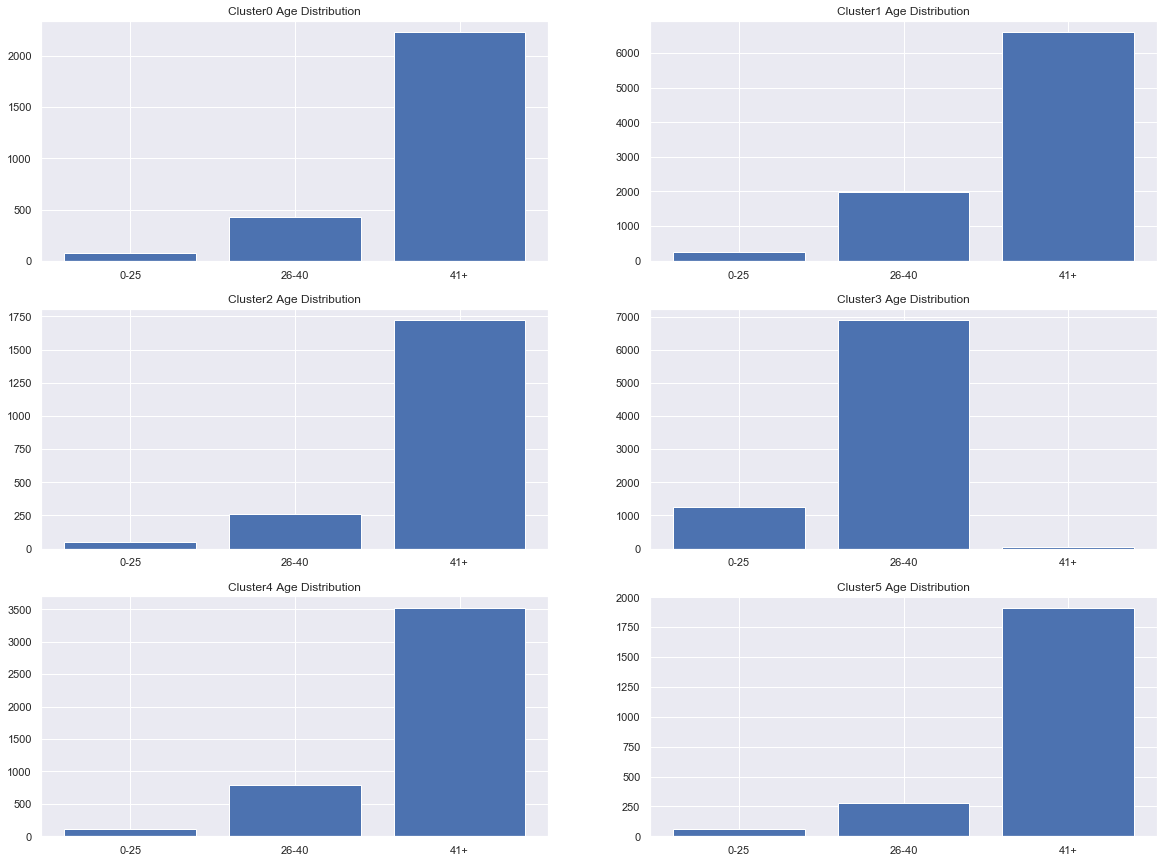

In [133]:
n2 = np.arange(3)
c0_age = [80,429,2230]
c1_age = [246,1985,6594]
c2_age = [46,261,1722]
c3_age = [1268,6895,53]
c4_age = [117,785,3521]
c5_age = [58,282,1911]

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.bar(n2, c0_age)
plt.xticks(n2, ('0-25', '26-40', '41+'))
plt.title('Cluster0 Age Distribution')

plt.subplot(3,2,2)
plt.bar(n2, c1_age)
plt.xticks(n2, ('0-25', '26-40', '41+'))
plt.title('Cluster1 Age Distribution')

plt.subplot(3,2,3)
plt.bar(n2, c2_age)
plt.xticks(n2, ('0-25', '26-40', '41+'))
plt.title('Cluster2 Age Distribution')

plt.subplot(3,2,4)
plt.bar(n2, c3_age)
plt.xticks(n2, ('0-25', '26-40', '41+'))
plt.title('Cluster3 Age Distribution')

plt.subplot(3,2,5)
plt.bar(n2, c4_age)
plt.xticks(n2, ('0-25', '26-40', '41+'))
plt.title('Cluster4 Age Distribution')

plt.subplot(3,2,6)
plt.bar(n2, c5_age)
plt.xticks(n2, ('0-25', '26-40', '41+'))
plt.title('Cluster5 Age Distribution')

plt.show()

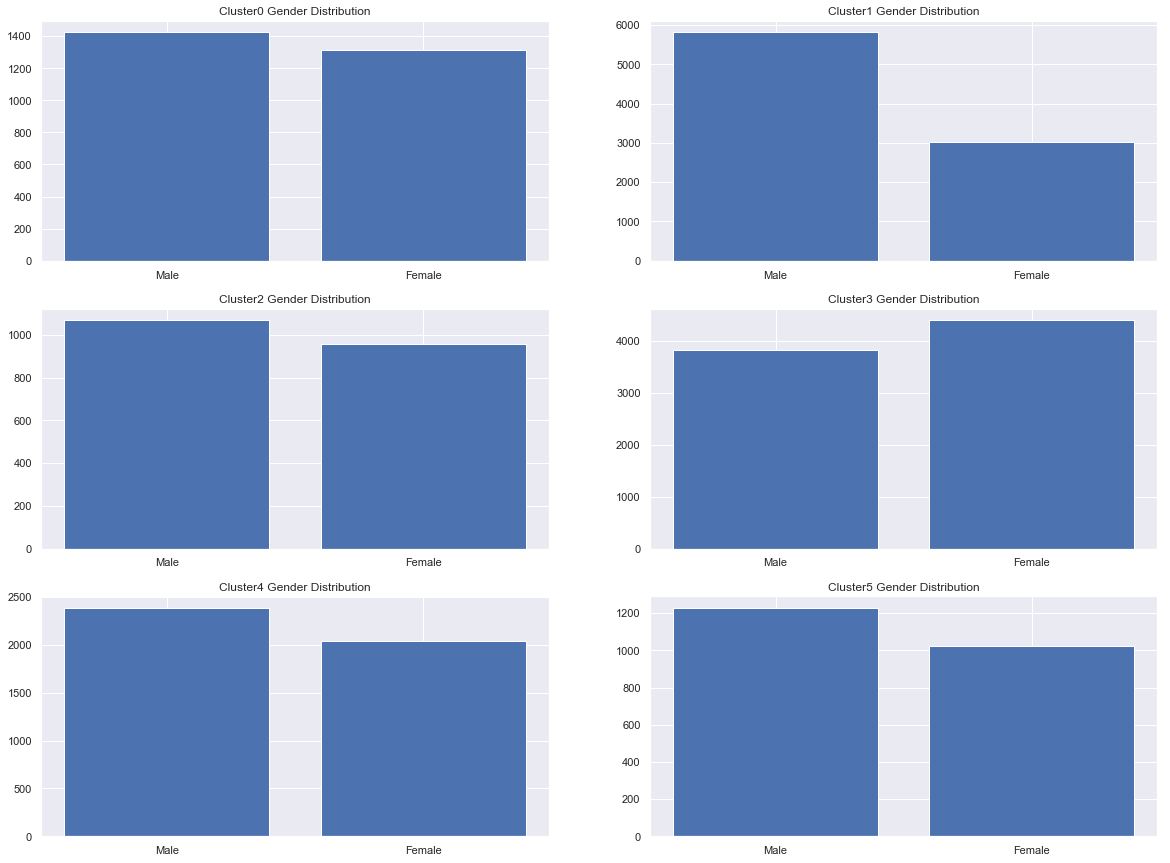

In [134]:
n1 = np.arange(2)
c0_gender = [1424,1315]
c1_gender = [5812,3013]
c2_gender = [1070,959]
c3_gender = [3822,4394]
c4_gender = [2387,2036]
c5_gender = [1228,1023]

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.bar(n1, c0_gender)
plt.xticks(n1, ('Male', 'Female'))
plt.title('Cluster0 Gender Distribution')

plt.subplot(3,2,2)
plt.bar(n1, c1_gender)
plt.xticks(n1, ('Male', 'Female'))
plt.title('Cluster1 Gender Distribution')

plt.subplot(3,2,3)
plt.bar(n1, c2_gender)
plt.xticks(n1, ('Male', 'Female'))
plt.title('Cluster2 Gender Distribution')

plt.subplot(3,2,4)
plt.bar(n1, c3_gender)
plt.xticks(n1, ('Male', 'Female'))
plt.title('Cluster3 Gender Distribution')

plt.subplot(3,2,5)
plt.bar(n1, c4_gender)
plt.xticks(n1, ('Male', 'Female'))
plt.title('Cluster4 Gender Distribution')

plt.subplot(3,2,6)
plt.bar(n1, c5_gender)
plt.xticks(n1, ('Male', 'Female'))
plt.title('Cluster5 Gender Distribution')

plt.show()

After cleaning the data and splitting it into testing and traing sets, the silhouette_score was used to determine that six clusters seemed a reasonable number.  Five of the clusters show a similar distribution with respect to gender and age, while Cluster3 is quite different.  While the other clusters are majority Male, Cluster3 is majority female.  Additionally, Cluster3 is mostly 26-40, while the other clusters are mostly 41+.  This leads one to wonder if the clusters are being determined based on running performance.